In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

## Clasification: Credit Card Campaign

### 1.EDA

#### exploring parameters of our data

In [2]:
df = pd.read_excel('./creditcardmarketing.xlsx')

In [3]:
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
df.shape

(18000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [6]:
df.describe()

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


#### Null values and column names

In [7]:
df.isnull().sum() # we don't have many NaN-s, that is good

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [8]:
cols1 = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns)) ]
df.columns = cols1 # standartizing column names

In [9]:
df.rename(columns={'#_bank_accounts_open': 'bank_accounts_open', '#_credit_cards_held': 'credit_cards_held', \
                 '#_homes_owned' : 'homes_owned' }, inplace=True) # standartizing column names

In [10]:
df['q1_balance'].fillna(df['q1_balance'].mean(), inplace=True)
df['q2_balance'].fillna(df['q2_balance'].mean(), inplace=True)
df['q3_balance'].fillna(df['q3_balance'].mean(), inplace=True)
df['q4_balance'].fillna(df['q4_balance'].mean(), inplace=True)
df['average_balance'].fillna(df['average_balance'].mean(), inplace=True)

#Filling the NaN-values with mean per column

In [11]:
df.isnull().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [12]:
df1 = df.drop(['customer_number'], axis=1) # dropped the customer number as we are not going to use it for our model

#### Ploting our columns

<Axes: xlabel='household_size', ylabel='count'>

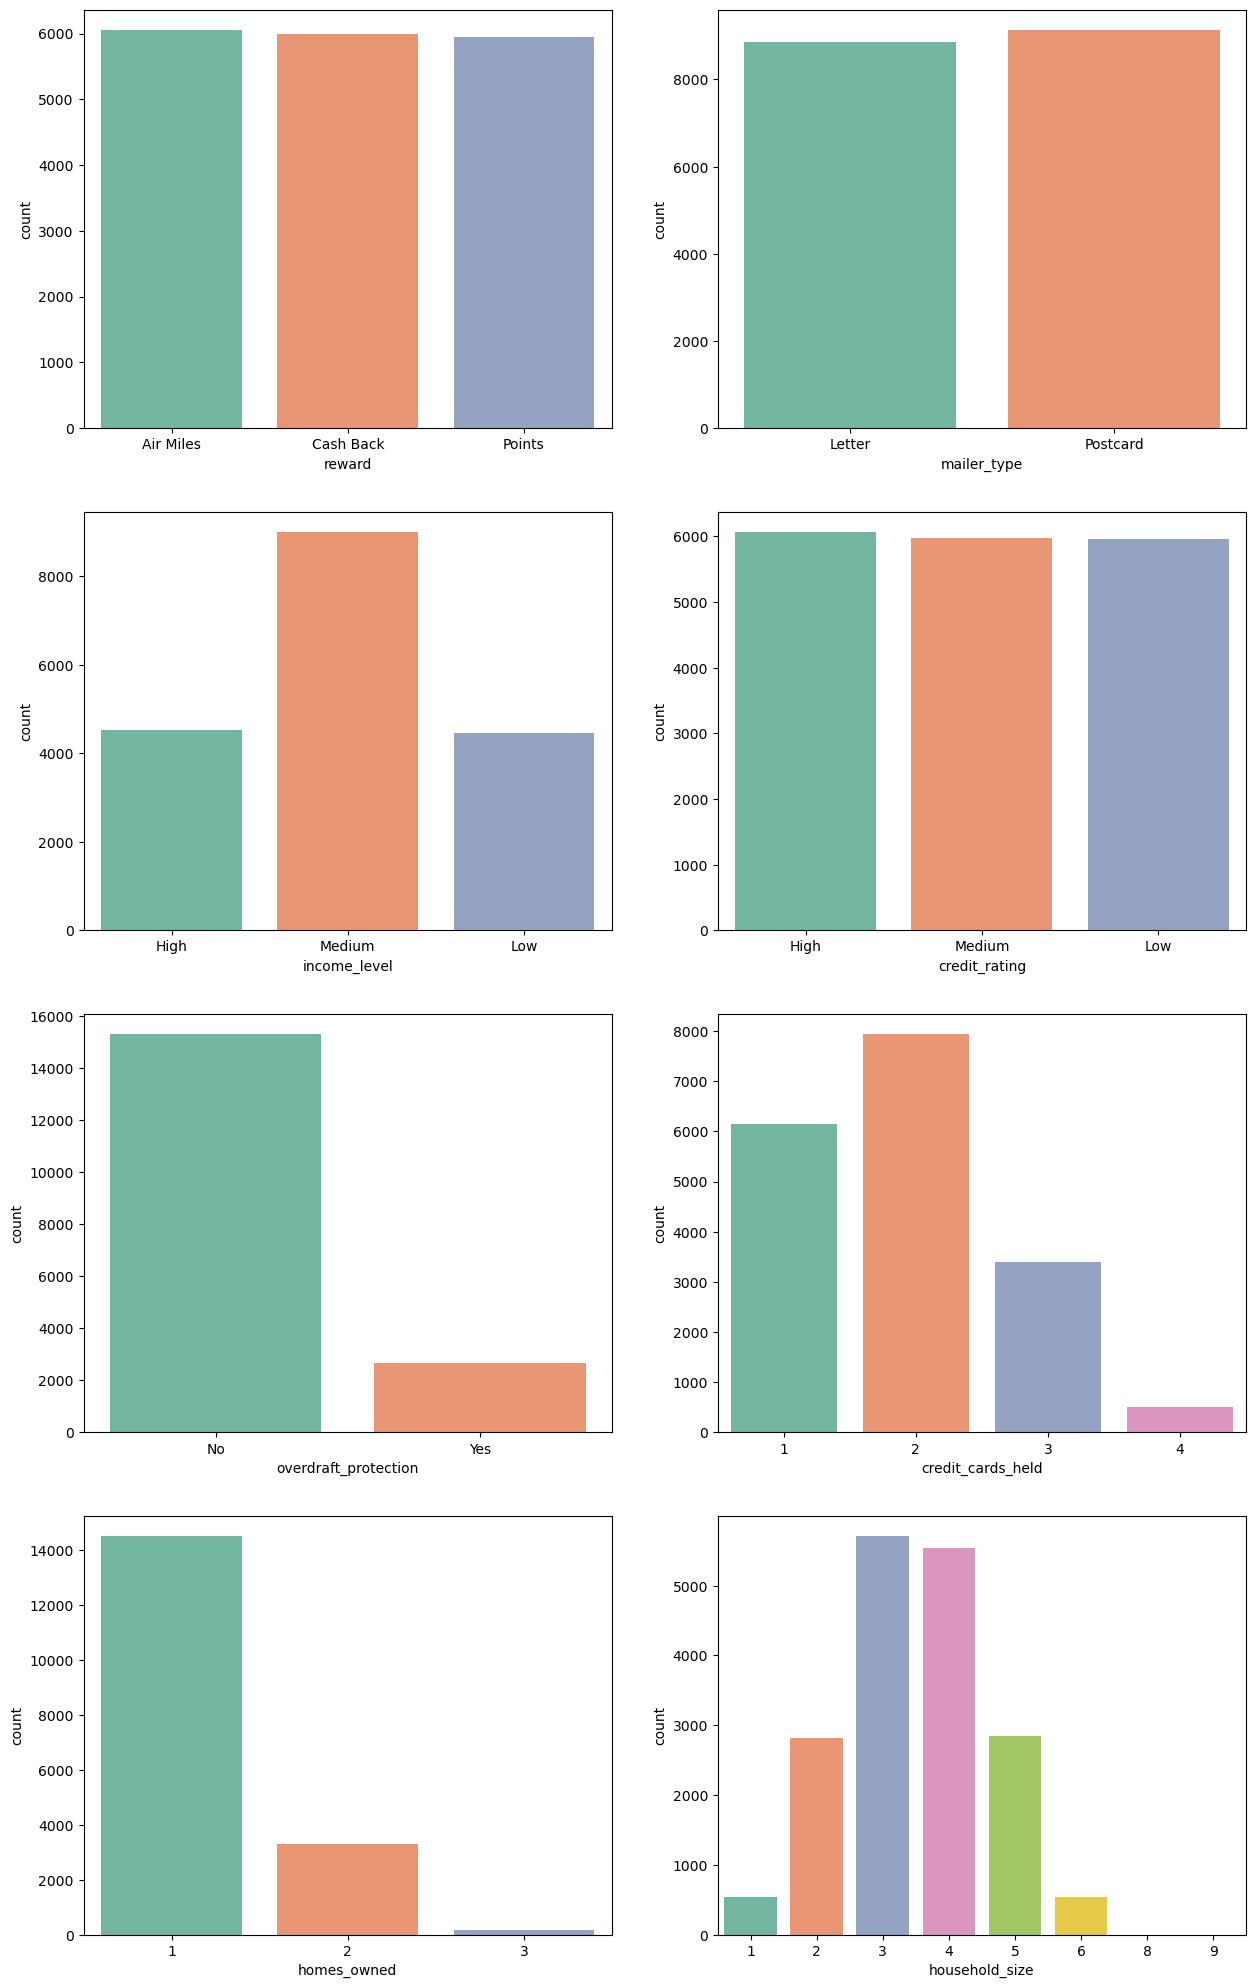

In [13]:
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)
sns.countplot(x = 'reward', palette = 'Set2', data = df1)

plt.subplot(4,2,2)
sns.countplot(x = 'mailer_type',palette = 'Set2', data = df1)

plt.subplot(4,2,3)
sns.countplot(x = 'income_level', palette = 'Set2', data = df1)

plt.subplot(4,2,4)
sns.countplot(x = 'credit_rating', palette = 'Set2', data = df1)

plt.subplot(4,2,5)
sns.countplot(x = 'overdraft_protection', palette = 'Set2', data = df1)

plt.subplot(4,2,6)
sns.countplot(x = 'credit_cards_held', palette = 'Set2', data = df1)

plt.subplot(4,2,7)
sns.countplot(x = 'homes_owned', palette = 'Set2', data = df1)

plt.subplot(4,2,8)
sns.countplot(x = 'household_size', palette = 'Set2', data = df1)


Worth notising that mailer type, credit rating have nearly equaly spread observations accross types, which shows that data it is decent quality data-sample and research campaign was devided into 3 groups, this will allow us to have a more solid fundament in drawing our conclusions later on.

<Axes: xlabel='offer_accepted', ylabel='count'>

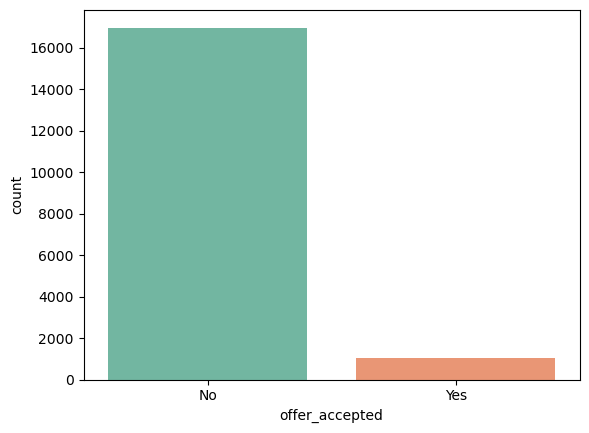

In [14]:
sns.countplot(x = 'offer_accepted', palette = 'Set2', data = df1)

However, our data seems to b biased and has much more observations with offer answers "No" over "Yes" (~95% of No and 5% Yes)

#### Bivariate Analysis

<Axes: xlabel='household_size', ylabel='count'>

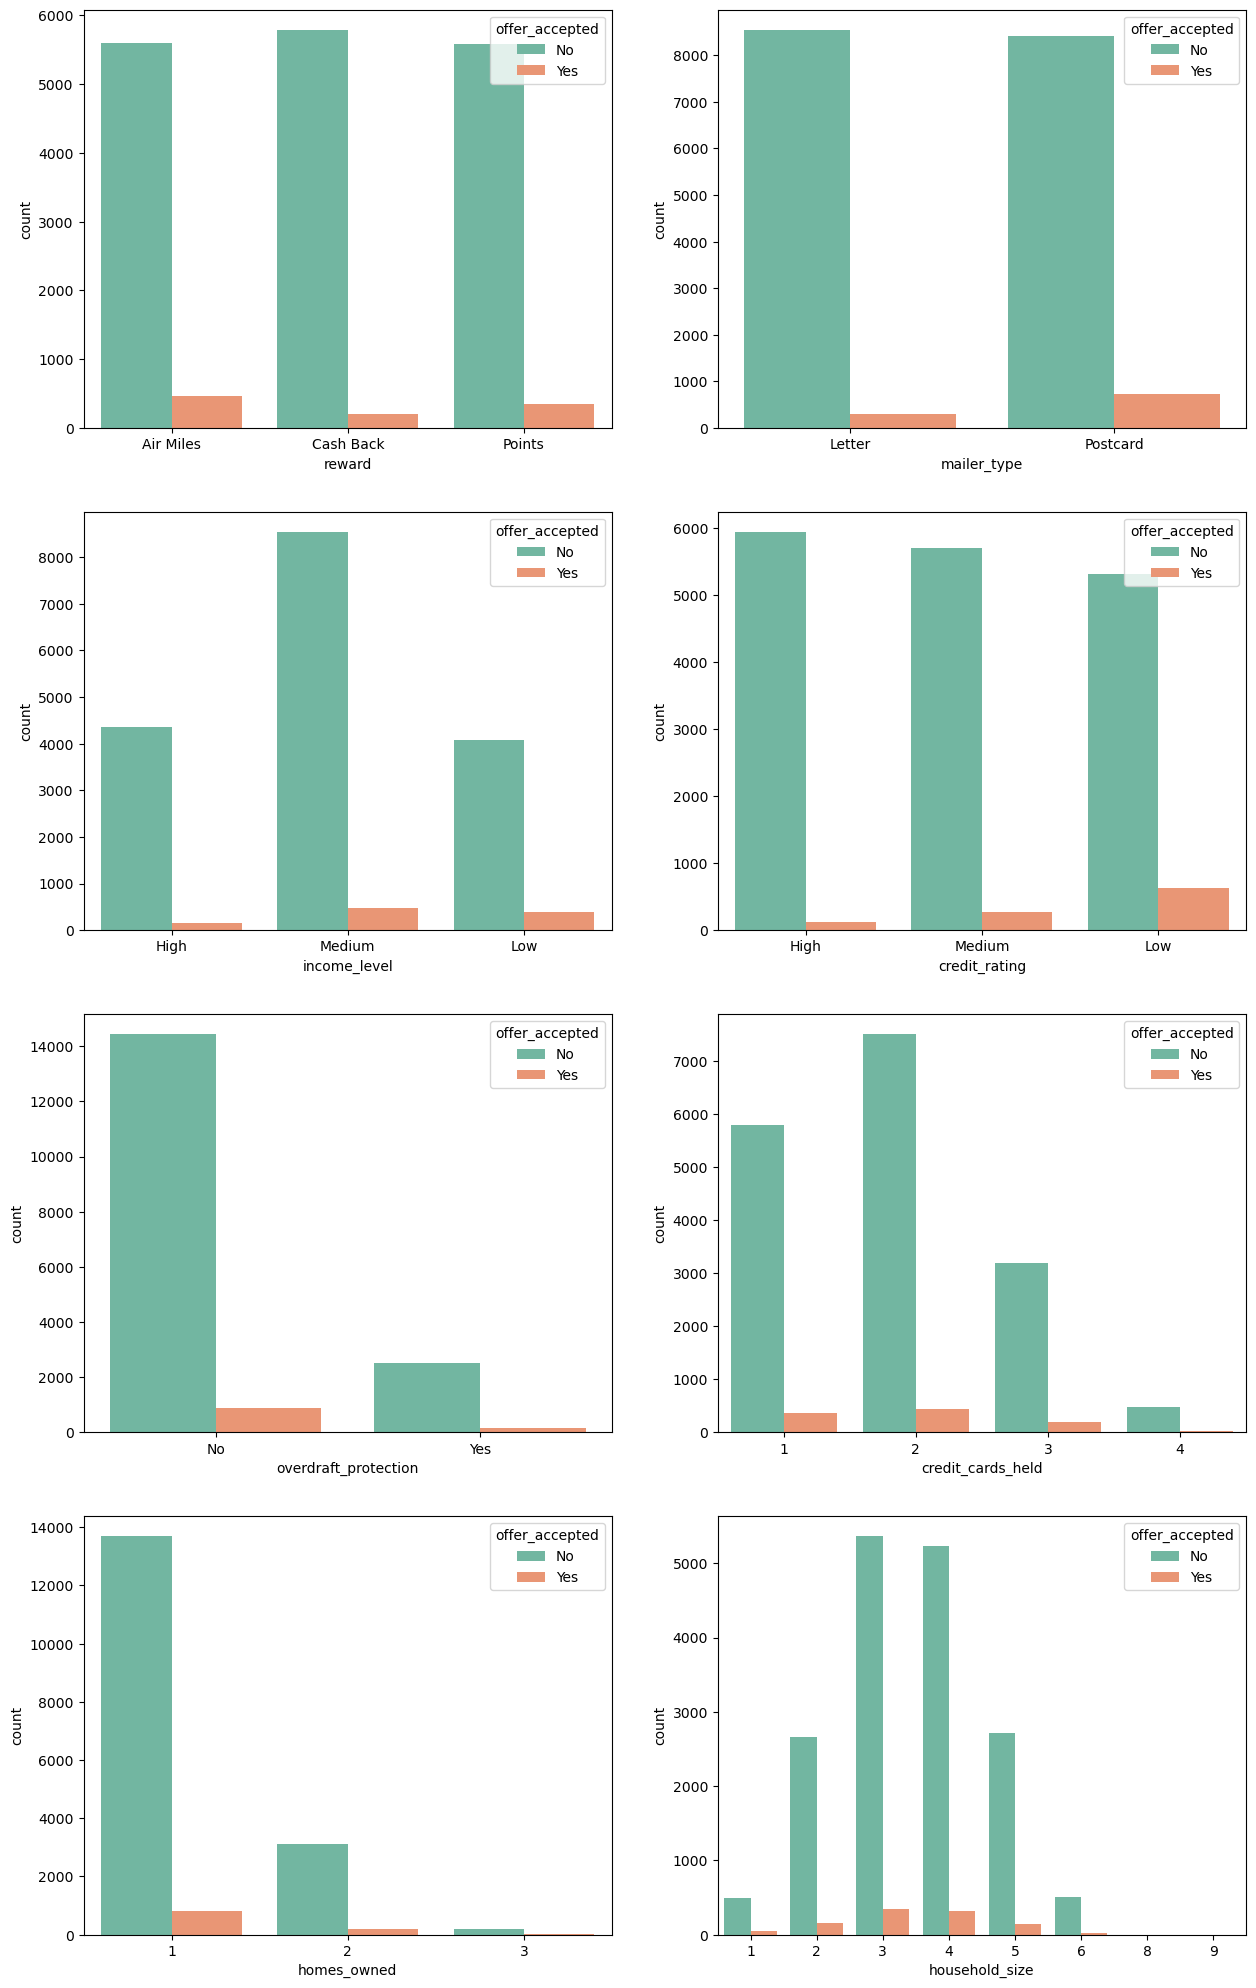

In [15]:
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)
sns.countplot(x = 'reward', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,2)
sns.countplot(x = 'mailer_type', hue = 'offer_accepted',palette = 'Set2', data = df1)

plt.subplot(4,2,3)
sns.countplot(x = 'income_level', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,4)
sns.countplot(x = 'credit_rating', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,5)
sns.countplot(x = 'overdraft_protection', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,6)
sns.countplot(x = 'credit_cards_held', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,7)
sns.countplot(x = 'homes_owned', hue = 'offer_accepted', palette = 'Set2', data = df1)

plt.subplot(4,2,8)
sns.countplot(x = 'household_size', hue = 'offer_accepted', palette = 'Set2', data = df1)

From plots below, it is clear that mailer type, reward, income level and credit rating columns have bigger correlation with positive offer answer then the other columns, where the offer answers seems to be more balanced. Additionally, I went through all those columns in  Tableau to prove this point.

<Axes: xlabel='reward', ylabel='count'>

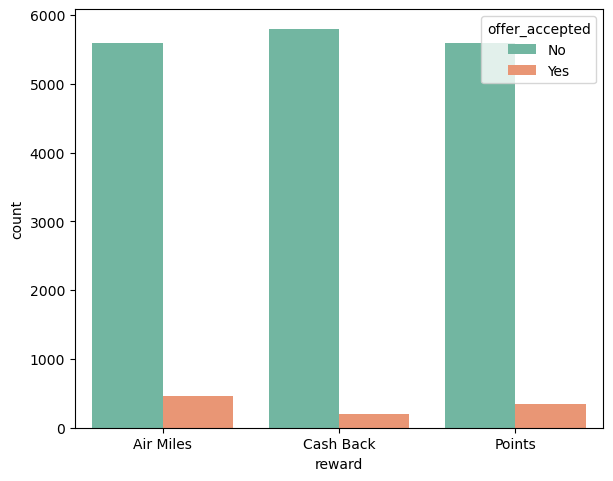

In [16]:
plt.figure(figsize = (15,25))
plt.subplot(4,2,1)
sns.countplot(x = 'reward', hue = 'offer_accepted', palette = 'Set2', data = df1)

#### Plotting numerical data

In [17]:
df1_numerical = df1.select_dtypes("number")

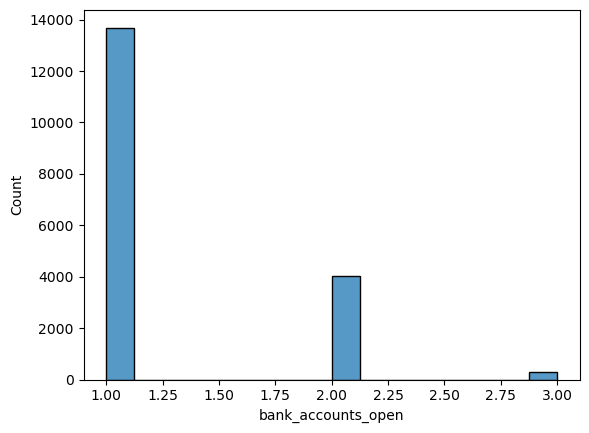

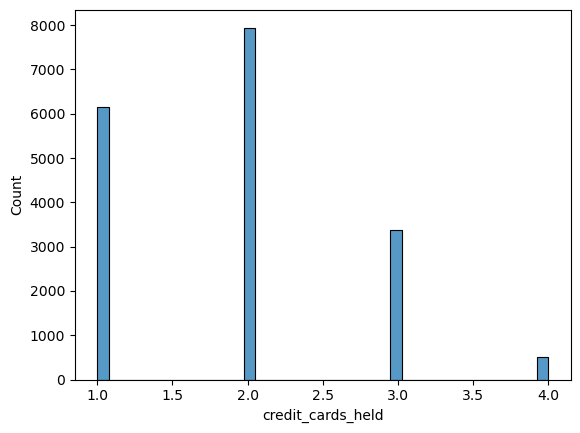

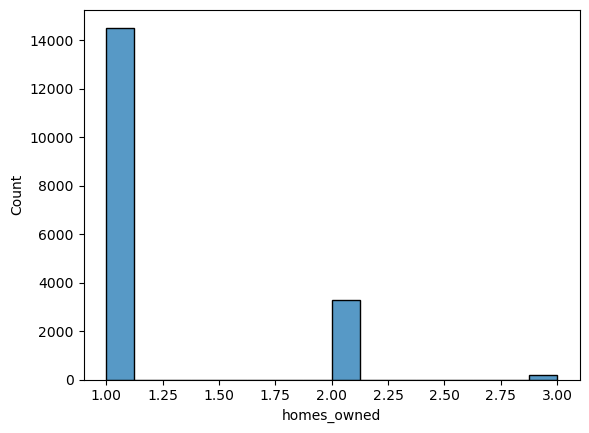

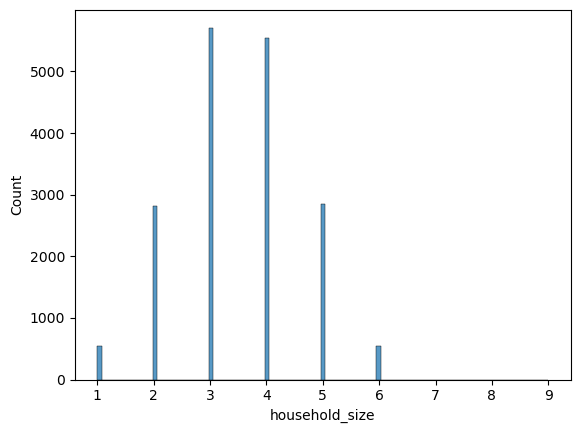

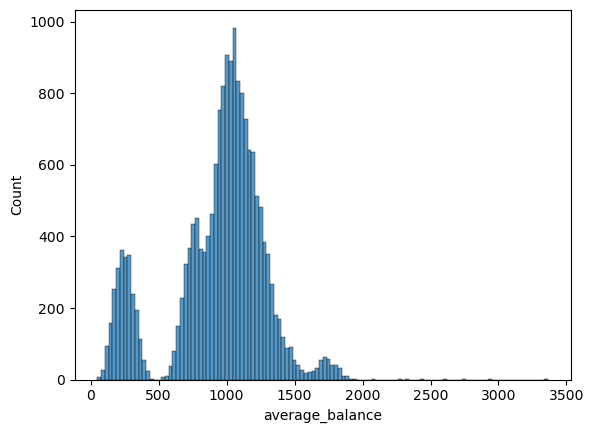

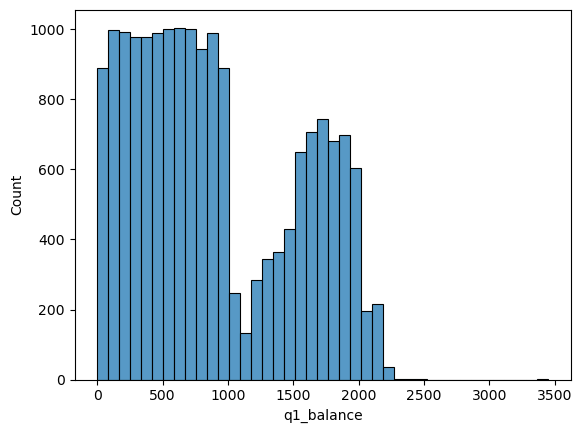

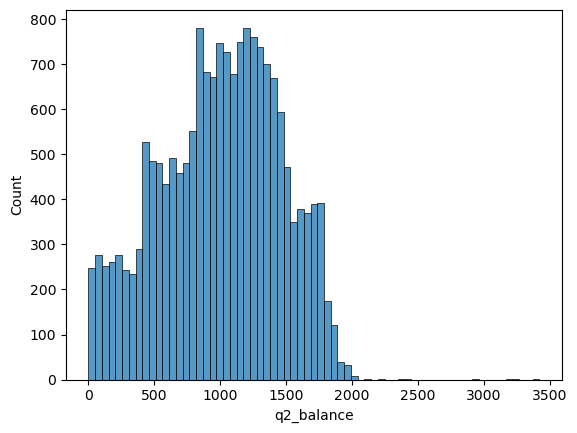

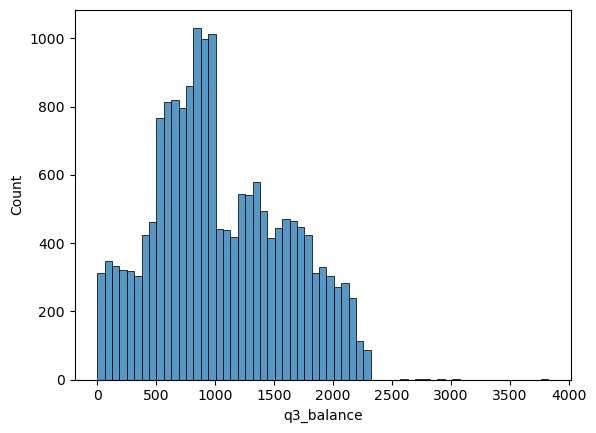

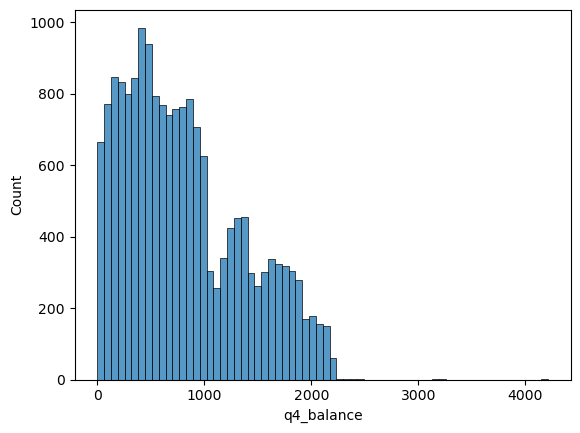

In [18]:
for col in df1_numerical.columns:
  sns.histplot(df1_numerical[col])
  plt.show()

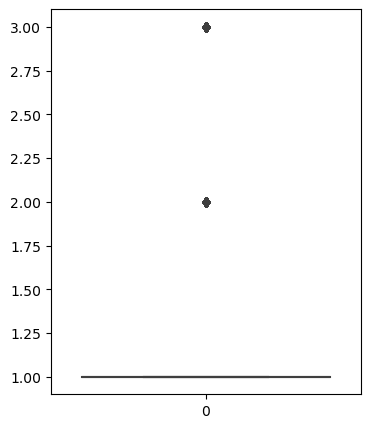

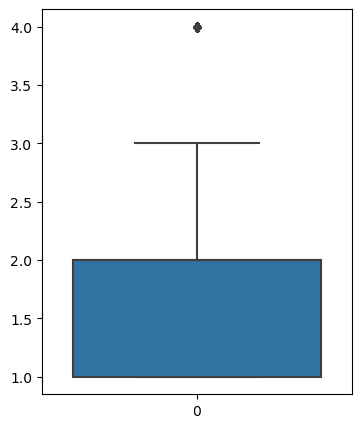

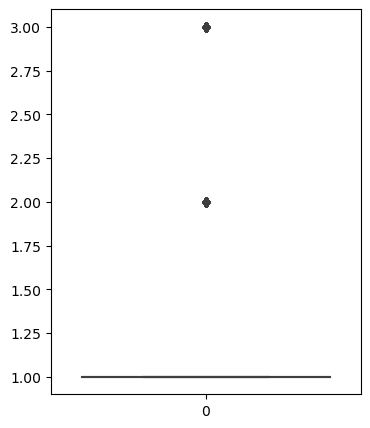

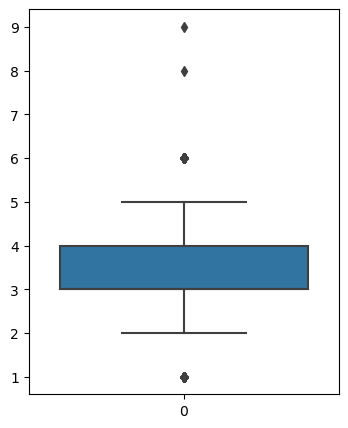

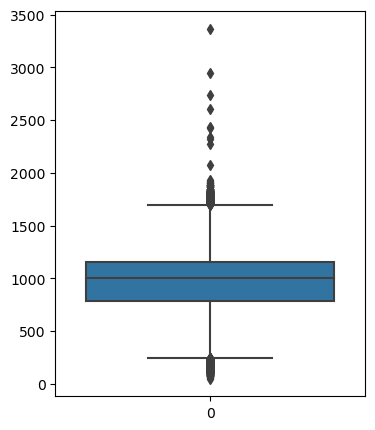

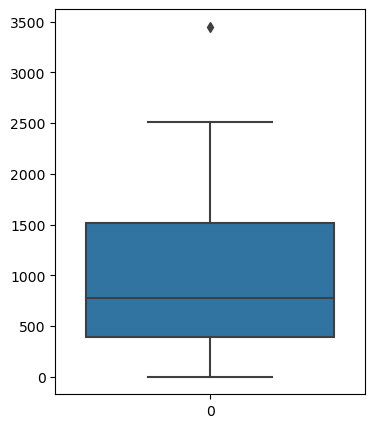

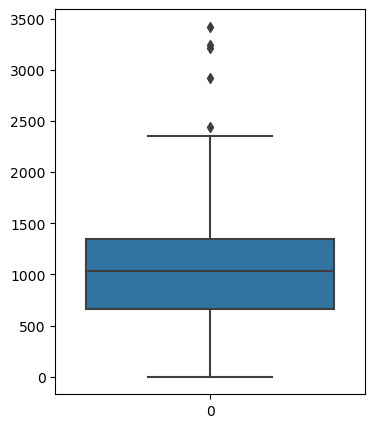

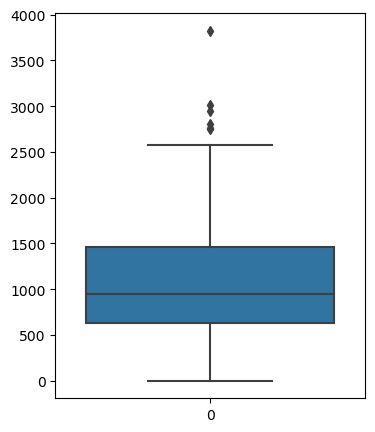

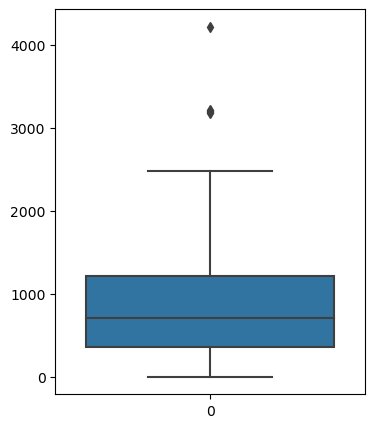

In [19]:
for col in df1_numerical.columns:
    plt.figure(figsize = (4,5))
    sns.boxplot(df1_numerical[col])
    plt.show()

Data has some visible outriers in continuous variables and some skewness in average balance columns. I will leave it that way for now.

### 2. Pre-processing & model building 

In [20]:
df2 = df1.copy()

In [21]:
df2.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


#### encoding

In [22]:
#manually encoding binary columns (Yes/no = 1/0)

In [23]:
df2['own_your_home'] = df2['own_your_home'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['own_your_home'].value_counts()

1    11655
0     6345
Name: own_your_home, dtype: int64

In [24]:
df2['overdraft_protection'] = df2['overdraft_protection'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['overdraft_protection'].value_counts()

0    15322
1     2678
Name: overdraft_protection, dtype: int64

In [25]:
df2['offer_accepted'] = df2['offer_accepted'].apply(lambda x: 1 if x == 'Yes' else 0)
df2['offer_accepted'].value_counts()

0    16977
1     1023
Name: offer_accepted, dtype: int64

In [26]:
onehot_encoder = OneHotEncoder()

In [27]:
onehot_encoder.fit(df2[["reward","mailer_type"]])

OneHotEncoder()

In [28]:
onehot_encoder.transform(df2[["reward","mailer_type"]]).todense()

matrix([[1., 0., 0., 1., 0.],
        [1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1.],
        ...,
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0.]])

In [29]:
onehot_encoder.categories_

[array(['Air Miles', 'Cash Back', 'Points'], dtype=object),
 array(['Letter', 'Postcard'], dtype=object)]

In [30]:
encoded_cols = list(onehot_encoder.categories)

In [31]:
cols = []
for i in onehot_encoder.categories_:
    cols.extend(i)

In [32]:
df2[cols] = onehot_encoder.transform(df2[["reward","mailer_type"]]).todense()

In [33]:
df2 = df2.drop(['reward','mailer_type'], axis = 1)

#### To have the right amount of columns after ordinal encoding, I will change values of columns income_level and credit_rating (it has same values across 2 columns), so that those columns could be distiguished.

In [34]:
df2['income_level'] = df2['income_level'].apply(lambda x: 'low_income' \
                                                              if x == 'Low' \
                                                              else('med_income' if x == 'Medium' else 'high_income'))

In [35]:
df2['credit_rating'] = df2['credit_rating'].apply(lambda x: 'low_credit_rating' \
                                                              if x == 'Low' \
                                                              else('med_credit_rating' if x == 'Medium' else 'high_credit_rating'))

In [36]:
ordinal_encoder = OrdinalEncoder(categories = [['low_income','med_income','high_income'], ['low_credit_rating','med_credit_rating','high_credit_rating',]])

In [37]:
ordinal_encoder.fit(df2[["income_level","credit_rating"]])

OrdinalEncoder(categories=[['low_income', 'med_income', 'high_income'],
                           ['low_credit_rating', 'med_credit_rating',
                            'high_credit_rating']])

In [39]:
df2[["income_level","credit_rating"]] = ordinal_encoder.transform(df2[["income_level","credit_rating"]])

In [69]:
df2.head() # our fully encoded data

,offer_accepted,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,Air Miles,Cash Back,Points,Letter,Postcard
0,0,2.0,1,0,2.0,2,1,4,0,1160.75,1669.0,877.0,1095.0,1002.0,1.0,0.0,0.0,1.0,0.0
1,0,1.0,1,0,1.0,2,2,5,1,147.25,39.0,106.0,78.0,366.0,1.0,0.0,0.0,1.0,0.0
2,0,2.0,2,0,1.0,2,1,2,1,276.50,367.0,352.0,145.0,242.0,1.0,0.0,0.0,0.0,1.0
3,0,1.0,2,0,2.0,1,1,4,0,1219.00,1578.0,1760.0,1119.0,419.0,1.0,0.0,0.0,1.0,0.0
4,0,1.0,1,0,1.0,2,1,6,1,1211.00,2140.0,1357.0,982.0,365.0,1.0,0.0,0.0,1.0,0.0


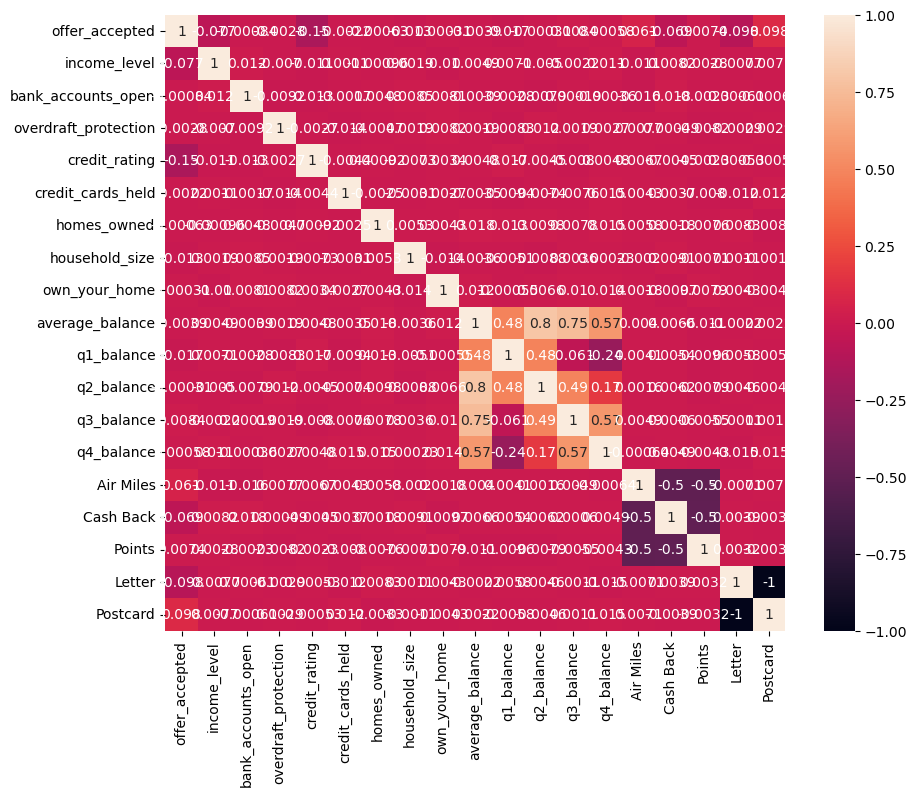

In [70]:
corr_matrix = df2.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

#### UnderSampling

Since our data is inbalanced, we decided to use UnderSampler to balance out the target values.

In [57]:
X = df2.drop('offer_accepted', axis = 1)

In [58]:
X = X.values

In [59]:
y = df2['offer_accepted']


In [60]:
rus = RandomUnderSampler(random_state=10)

In [61]:
X, y = rus.fit_resample(X, y)

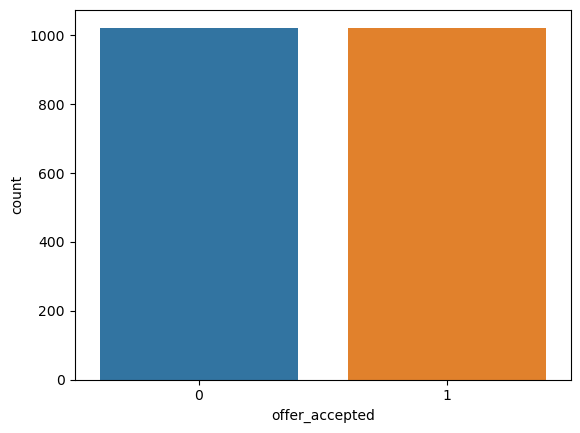

In [63]:
ax = sns.countplot(x=y) # undersampled y, 1 = YES , 0 = NO


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [66]:
X_train.shape, y_train.shape

((1432, 18), (1432,))

In [67]:
X_test.shape, y_train.shape

((614, 18), (614,))